# SyriaTel Company


### Business Understanding

SyriaTel is a communication company that deals with Call-related services calls and messaging services. The company is realising revenue loss due to custmers churn. there are various reasons why customers would terminate the their business woth SeriaTel; among them are quality of services provided and the cost of call or messeges etc. To understand the root cause of the customer churn, it is important to develop a model that will predict potential customer churn, thus identifying the factors that increase the rate of customers's customers churn. This will help company take necesary actions to reduce churn.

### Project Objective

The primary objective is to develop a robust predictive model to identify customers at risk of churning from SyriaTel, our telecommunications company. By understanding and predicting customer churn, we aim to minimize revenue loss and proactively implement retention strategies.
#### Key Questions 
1.	What are the primary factors influencing customer churn?
2.	Are there specific patterns in usage or billing that precede a customer's decision to leave?
3.	Can customer service interactions serve as early indicators of dissatisfaction?

#### Scope
The scope of this project encompasses the analysis of historical customer data to identify patterns and indicators associated with churn. The focus is on developing a binary classification model that can effectively distinguish between customers likely to churn and those likely to stay.


#### Key Stakeholders
1.	Telecom Operations Team:  They are interested in reducing churn as it directly impacts revenue and customer satisfaction.
2.	Marketing Team: The marketing team can leverage insights from the model to design targeted campaigns aimed at retaining at-risk customers.
3.	Customer Service Team: Proactive identification of potential churners enables the customer service team to intervene and address issues promptly, enhancing customer satisfaction.

#### Data Sources 
Data sources include customer profiles, usage patterns, billing information, customer service interactions, contract details, and network performance metrics. The dataset should be representative of diverse customer segments and cover a sufficient historical period.

#### Key Questions
1.	What are the primary factors influencing customer churn?
2.	Are there specific patterns in usage or billing that precede a customer's decision to leave?
3.	Can customer service interactions serve as early indicators of dissatisfaction?


#### Success Criteria
The success of the project will be evaluated based on the model's predictive accuracy, precision, recall, and the ability to identify potential churners before they actually leave. The business impact will be measured by a reduction in churn rates and an increase in overall customer retention.

#### Risks 
Ethical Considerations: Ensuring the ethical use of customer data and compliance with privacy regulations is paramount.

#### Challenges
1.	Data Quality: Incomplete or inaccurate data may affect the model's performance.
2.	Changing Market Dynamics: Rapid changes in the telecom market may influence customer behavior, requiring the model to adapt.



### Data Understanding
##### importing libraries to load and interprete data

In [4]:
#importing the neccesary libraries for our analysis
import pandas as pd #
import numpy as np#
import matplotlib.pyplot as plt #
import seaborn as sns#
%matplotlib inline



# Sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel



import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading the data into a dataframe and previewing the first 5 rows just to see how our data looks like
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv') # using pandas to read the csv file containing the data
pd.set_option('display.max_columns', None)# inbuilt function ensures that all our columns are displayed rather than just half version 
#of it
df.head()# display of the first five rows of the data set

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Description of the Dataset 
#### Customer Profiles
Includes demographic information, subscription details, and customer identifiers.

#### Usage Patterns:
Data on call frequency, duration, data usage, and text messaging.

#### Billing Information:
Payment history, overdue payments, and spending patterns.

### Checking for Data Accuracy

In [13]:
print ("shape:", df.shape,'\n') # I'm looking at the shape of the data to understand the number of rows and columns 

print("Column infomation:\n",df.info()) # Checking the characteristic of and components of the DataFrame;  including the size, column names, data types, and the number
        # missin valuse , if present 

shape: (3333, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls   

In [20]:
df.columns # displaying all the columns of the dataset

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [19]:
df.describe() # Performing central tendency operations: mean, mode and quartile for all columns with interger and float 
              # data types 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Dataset Description

Size and Structure:

* Number of Rows : 3333 entries, ranging from 0 to 3332. 

* Number of Columns: There are 21 columns in the DataFrame.

Column Information:

* Columns include various types of data, such as integers, floats, objects (likely strings), and a boolean (churn column).

* Some of the columns include: state, account length, area code, phone number, international plan, voice mail plan etc.



#### Distribution of Churn Customers in the dataset

In [33]:
# Calculating churn state_churn_rates

total_customers = len(df) # calculating the total number of customers in the dataset 
churned_customers = df['churn'].sum() # culcalting the total number of customer whose churn state is 'True'

churn_rate = churned_customers / total_customers # calculating the percetage of the 'True' customers 

print(f"Churn Rate: {churn_rate:.2%} : Indicating a potential revenue loss for the company at almost the same rate.")
                                      # dsplaying the result of our calculation


Churn Rate: 14.49% : Indicating a potential revenue loss for the company at almost the same rate.


In [26]:
df['churn'].value_counts() # counting the number of element in each category of 'True' and 'False' state of customer churn.
                           # True indicates that the custumer ended the their service with SyriaTel, 
                           # False shows that the customer is still present.

False    2850
True      483
Name: churn, dtype: int64

There is imbalance distibutiion of "True" and "False" statements in the dataset, 14.49% represnting True and False Taking up 85.51%

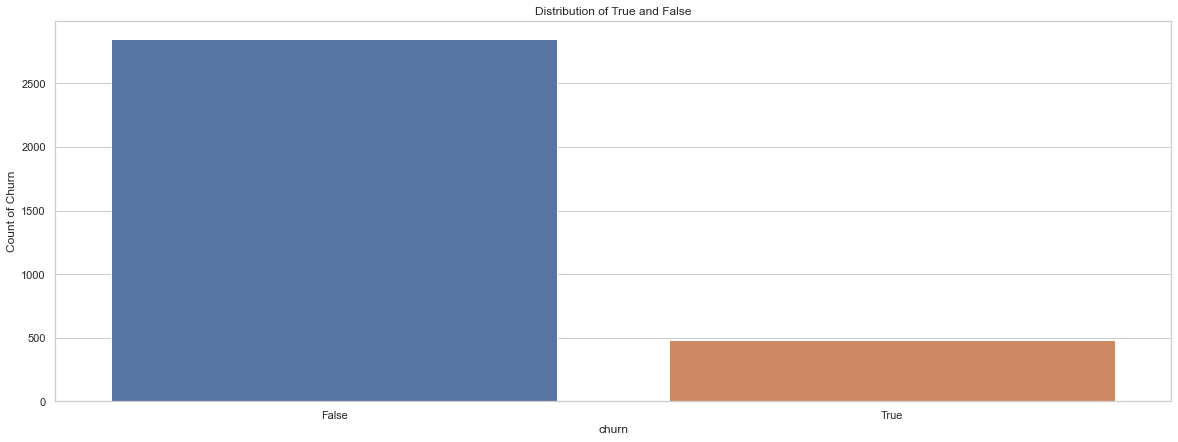

In [31]:
# ploting the disticnution of customers churn state
plt.figure(figsize=(20,7))
sns.set(style='whitegrid')
sns.countplot(df['churn'])
plt.title('Distribution of True and False')
plt.xlabel('churn')
plt.ylabel('Count of Churn')
plt.show()

### Exploratory Data Analysis

#### Missing Values:

In [35]:
Missing_val=df.isnull().sum().sort_values(ascending=False)#This determines how many missing values in each column then sum all the
                                                    # missing values in each column.
                                                    
Percent_Cal=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)#This arranges the values in descending order with 

missing_data=pd.concat([Missing_val,Percent_Cal],axis=1,keys=['Total','Percent_Cal'])#combining tatal and percentage into a new 
                                                                    #DataFrame called missing_data
missing_data

,Total,Percent
churn,0,0.0
total day charge,0,0.0
account length,0,0.0
area code,0,0.0
phone number,0,0.0
international plan,0,0.0
voice mail plan,0,0.0
number vmail messages,0,0.0
total day minutes,0,0.0
total day calls,0,0.0
